In [2]:
# To find out Demand and suplly zones using Volumes

In [3]:
# Start by importing NumPy and vectorbt. You’ll use SciPy to test the statistical significance of the results.
import numpy as np
import scipy.stats as stats
import pandas as pd
import warnings
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
warnings.simplefilter('ignore', FutureWarning)
from iexfinance.stocks import get_historical_data
import pandas_datareader as pdr

In [4]:
import pandas as pd
from datetime import datetime
from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data

# Define the API key
IEX_CLOUD_API_TOKEN = ''

# Define the start and end date
start_date = datetime(2023, 1, 15)
# Define the symbol
symbol = 'AAPL'

# Download the historical data
price = get_historical_data(symbol, start=start_date, end=None, output_format='pandas', token=IEX_CLOUD_API_TOKEN)

# Print the DataFrame
print(price)

             close     high       low     open   priceDate symbol    volume   
2023-01-17  135.94   137.29    134.13   134.83  2023-01-17   AAPL  63646627  \
2023-01-18  135.21   138.61    135.03  136.815  2023-01-18   AAPL  69672800   
2023-01-19  135.27   136.25    133.77   134.08  2023-01-19   AAPL  58280413   
2023-01-20  137.87   138.02    134.22   135.28  2023-01-20   AAPL  80223626   
2023-01-23  141.11  143.315     137.9   138.12  2023-01-23   AAPL  81760313   
...            ...      ...       ...      ...         ...    ...       ...   
2023-04-24  165.33    165.6    163.89      165  2023-04-24   AAPL  41949581   
2023-04-25  163.77  166.305    163.73   165.19  2023-04-25   AAPL  48714063   
2023-04-26  163.76   165.28     162.8  163.055  2023-04-26   AAPL  45498796   
2023-04-27  168.41   168.56    165.19   165.19  2023-04-27   AAPL  64902329   
2023-04-28  169.68   169.85  167.8801   168.49  2023-04-28   AAPL  55275851   

                           id   key subkey  ...    

In [5]:
price["close-Prev_close"]= price['close']-price["close"].shift(-1)
price["open-Prev_open"]= price['open']-price["open"].shift(-1)
price["high-Prev_high"]= price['high']-price["high"].shift(-1)
price["low-Prev_low"]= price['low']-price["low"].shift(-1)
price["close-open"]= price["close"] -price["open"]

price['vol/close-Prev_close']= price["volume"]/(price["close-Prev_close"])
price["vol/open-Prev_open"] =price["volume"]/(price["open-Prev_open"])
price["vol/high-Prev_high"] = price["volume"]/(price["high-Prev_high"])
price["vol/low-Prev_low"] = price["volume"]/(price["low-Prev_low"])
price["vol/close-open"] = price["volume"]/(price["close-open"])

In [6]:
price

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,close-Prev_close,open-Prev_open,high-Prev_high,low-Prev_low,close-open,vol/close-Prev_close,vol/open-Prev_open,vol/high-Prev_high,vol/low-Prev_low,vol/close-open
2023-01-17,135.94,137.29,134.13,134.83,2023-01-17,AAPL,63646627,HISTORICAL_PRICES,AAPL,,...,0.73,-1.985,-1.32,-0.9,1.11,87187160.273974,-32063791.939547,-48217141.666666,-70718474.444444,57339303.603604
2023-01-18,135.21,138.61,135.03,136.815,2023-01-18,AAPL,69672800,HISTORICAL_PRICES,AAPL,,...,-0.06,2.735,2.36,1.26,-1.605,-1161213333.333289,25474515.539305,29522372.881356,55295873.015873,-43409844.23676
2023-01-19,135.27,136.25,133.77,134.08,2023-01-19,AAPL,58280413,HISTORICAL_PRICES,AAPL,,...,-2.6,-1.2,-1.77,-0.45,1.19,-22415543.461539,-48567010.833334,-32926787.00565,-129512028.888892,48975136.97479
2023-01-20,137.87,138.02,134.22,135.28,2023-01-20,AAPL,80223626,HISTORICAL_PRICES,AAPL,,...,-3.24,-2.84,-5.295,-3.68,2.59,-24760378.395062,-28247755.633803,-15150826.440038,-21799898.369565,30974372.972973
2023-01-23,141.11,143.315,137.9,138.12,2023-01-23,AAPL,81760313,HISTORICAL_PRICES,AAPL,,...,-1.42,-2.185,0.155,-2.4,2.99,-57577685.211268,-37418907.551487,527485890.322577,-34066797.083333,27344586.287625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,165.33,165.6,163.89,165,2023-04-24,AAPL,41949581,HISTORICAL_PRICES,AAPL,,...,1.56,-0.19,-0.705,0.16,0.33,26890757.051282,-220787268.421055,-59502951.773049,262184881.250006,127119942.424238
2023-04-25,163.77,166.305,163.73,165.19,2023-04-25,AAPL,48714063,HISTORICAL_PRICES,AAPL,,...,0.01,2.135,1.025,0.93,-1.42,4871406299.990585,22816891.334895,47525915.121951,52380712.903227,-34305678.169014
2023-04-26,163.76,165.28,162.8,163.055,2023-04-26,AAPL,45498796,HISTORICAL_PRICES,AAPL,,...,-4.65,-2.135,-3.28,-2.39,0.705,-9784687.311828,-21310911.47541,-13871584.146341,-19037153.138075,64537299.290782
2023-04-27,168.41,168.56,165.19,165.19,2023-04-27,AAPL,64902329,HISTORICAL_PRICES,AAPL,,...,-1.27,-3.3,-1.29,-2.6901,3.22,-51104196.062992,-19667372.424242,-50311882.945737,-24126362.960485,20156002.795031


<Axes: >

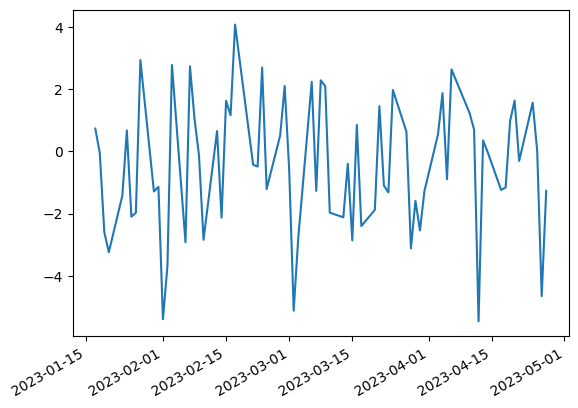

In [7]:
price["close-Prev_close"].plot()

<Axes: >

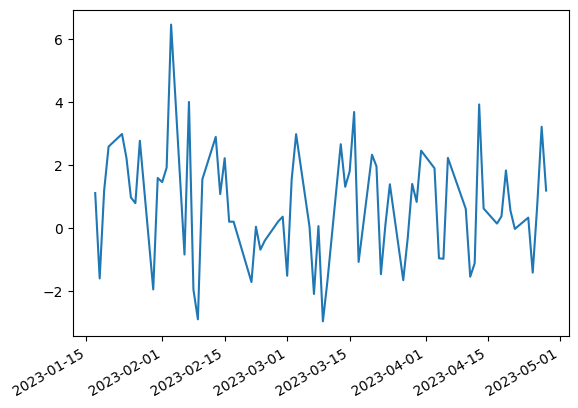

In [8]:
price["close-open"].plot()

<Axes: >

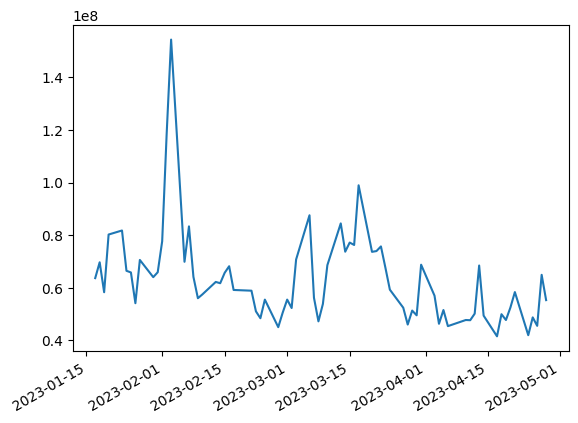

In [9]:
price["volume"].plot()

In [10]:
#for i in range(len(price)):
#    if price["close-Prev_close"][i] > 0.0 and price["close-open"][i] >  0.0 and price['vol/close-open'][i] >200000:
#        print("Buy @ {} ".format(price["close"]))
#    else:
#        print("SEll @ {}  ".format(price["close"]))

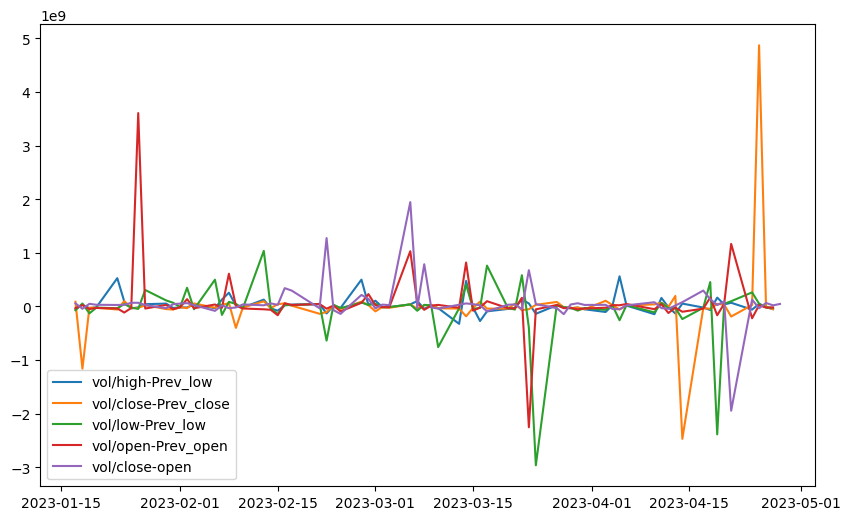

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot both variables on the same plot
ax.plot(price["vol/high-Prev_high"], label='vol/high-Prev_low')
ax.plot(price['vol/close-Prev_close'], label='vol/close-Prev_close')
ax.plot(price['vol/low-Prev_low'], label='vol/low-Prev_low')
ax.plot(price['vol/open-Prev_open'], label='vol/open-Prev_open')
#ax.plot(price["volume"], label='volume')
ax.plot(price["vol/close-open"], label='vol/close-open')
ax.legend() 
plt.show()

In [18]:
# Considering difference of close and previous close
close=price["vol/close-Prev_close"].sort_values(ascending=False) # Good to go long on the having high positive values 
close.tail(20)

2023-04-18     -43037075.862069
2023-03-07     -44237817.322834
2023-02-24     -45842649.586778
2023-01-30     -49624243.410853
2023-04-27     -51104196.062992
2023-03-23     -51228833.333334
2023-03-31      -54133694.48819
2023-04-05     -57235271.111111
2023-01-23     -57577685.211268
2023-01-31     -57784613.157894
2023-03-22     -68819828.181819
2023-03-01     -92464985.000001
2023-02-22    -104104704.081631
2023-02-21    -136900534.883719
2023-03-14    -184239732.499997
2023-04-21    -188184970.967741
2023-02-09     -400051021.42861
2023-01-18   -1161213333.333289
2023-04-14   -2469324000.002246
2023-04-28                  NaN
Name: vol/close-Prev_close, dtype: object

In [19]:
close.head(20) # Good to Short Apple on these days, having high negative value

2023-04-25    4871406299.990585
2023-04-13      195558997.14286
2023-04-03     105511457.407409
2023-01-24      99156928.358211
2023-02-13      95690789.230768
2023-03-16      89711081.176471
2023-02-27      88232294.117649
2023-01-17      87187160.273974
2023-03-27      83159152.380953
2023-04-11      68063167.142855
2023-02-08      61066741.904763
2023-02-16      58765467.241379
2023-02-03      55724670.397112
2023-03-21      50991920.689656
2023-04-19      48694046.938776
2023-02-15      40536575.308642
2023-03-06      39263689.686098
2023-04-10       38794213.00813
2023-04-20      32181826.380368
2023-02-07      30521080.952381
Name: vol/close-Prev_close, dtype: object

In [20]:
# Considering Vol/ low -prev low
low= price["vol/low-Prev_low"].sort_values(ascending=False)
low.head(15)

2023-02-13    1036650216.667118
2023-03-17     761112561.538488
2023-03-22     582321623.076943
2023-02-06     498987899.999947
2023-04-18     453845527.272671
2023-03-14     409421627.777762
2023-02-02     348055823.529437
2023-01-27     306764534.782584
2023-04-24     262184881.250006
2023-01-30     112307498.245615
2023-04-21      97228901.666663
2023-02-08      85722030.748661
2023-02-27      72578177.419358
2023-01-31      68619228.124999
2023-04-11      65266050.684932
Name: vol/low-Prev_low, dtype: object

In [21]:
low.tail(15)# Good to short

2023-01-17     -70718474.444444
2023-03-30     -77467431.924881
2023-03-07     -80260039.999998
2023-04-10    -110969493.023261
2023-01-19    -129512028.888892
2023-02-15    -140468988.235294
2023-02-07    -157807861.742418
2023-04-14    -235173714.285705
2023-04-05    -257558720.000015
2023-03-23    -397776823.529441
2023-02-22      -637641312.4999
2023-03-10    -758544247.787709
2023-04-19   -2386008299.998779
2023-03-24   -2962817149.998484
2023-04-28                  NaN
Name: vol/low-Prev_low, dtype: object

In [22]:
# Considering Vol/ open -prev open
open1= price["vol/open-Prev_open"].sort_values(ascending=False)
open1.head(15)

2023-01-26    3607004533.336614
2023-04-21    1166746819.999735
2023-03-06    1030094447.058727
2023-03-14     818843255.555524
2023-02-08     610667419.047679
2023-02-28     229759081.818183
2023-04-18     166410026.666676
2023-03-22     161067682.978724
2023-02-02     136021816.091953
2023-03-17      97964983.168315
2023-02-27           68179500.0
2023-03-07      63125874.157304
2023-02-16      58765467.241379
2023-04-20      50438824.038462
2023-04-06      44940715.841583
Name: vol/open-Prev_open, dtype: object

In [23]:
open1.tail(15)

2023-02-13     -53252579.623287
2023-03-30     -54397460.439561
2023-03-24      -54866984.25926
2023-02-14     -62330881.818181
2023-03-08     -63023753.004006
2023-03-15     -79554501.030928
2023-02-24     -92449343.333334
2023-04-14          -98772960.0
2023-01-24    -113564345.299149
2023-04-12    -122275760.975611
2023-02-15    -164173130.000009
2023-04-19    -164552296.551729
2023-04-24    -220787268.421055
2023-03-23   -2254068666.666581
2023-04-28                  NaN
Name: vol/open-Prev_open, dtype: object

In [24]:
# Considering Vol/ high -prev high
high= price["vol/high-Prev_high"].sort_values(ascending=False)
high.head(15)

2023-04-05    562355283.842797
2023-01-23    527485890.322577
2023-02-27    499983000.000139
2023-03-14    475457374.193545
2023-02-08         256480316.0
2023-04-19    164552296.551729
2023-04-11    158814056.666661
2023-03-22    128329905.068656
2023-02-07    128188540.000004
2023-02-13    126936761.224495
2023-03-01    106999018.322085
2023-03-07    100342968.387212
2023-01-24     91007043.835618
2023-04-21      68463021.94578
2023-03-23     55881381.703992
Name: vol/high-Prev_high, dtype: object

In [25]:
high.tail(15)

2023-01-17    -48217141.666666
2023-04-27    -50311882.945737
2023-03-31    -53294412.403101
2023-04-24    -59502951.773049
2023-04-18    -66564010.666667
2023-02-15     -79119580.72289
2023-03-17    -91615400.925927
2023-04-03   -103593067.272725
2023-02-22   -130798217.948713
2023-04-13   -131626248.076928
2023-03-24   -137805448.837207
2023-04-10   -144596612.121207
2023-03-16   -272337210.714285
2023-03-13    -324835084.61536
2023-04-28                 NaN
Name: vol/high-Prev_high, dtype: object

In [26]:
# Considering Vol/ high -prev high
closeopen= price["vol/close-open"].sort_values(ascending=False)
closeopen.head(15)

2023-03-06    1945733955.554867
2023-02-22    1275282625.000254
2023-03-08     786746516.666637
2023-03-23     676220600.000038
2023-02-16     340839709.999971
2023-04-17     296544407.142886
2023-02-17     295720589.999975
2023-02-27     214278428.571449
2023-02-28     140408327.777784
2023-04-18     134927048.648647
2023-04-24     127119942.424238
2023-04-20      93672101.785714
2023-04-14      79655612.903225
2023-04-10       78224396.72131
2023-01-26      68487427.848099
Name: vol/close-open, dtype: object

In [27]:
closeopen.tail(15)

2023-02-21     -34225133.72093
2023-04-25    -34305678.169014
2023-03-01     -36499336.18421
2023-03-10     -40100818.71345
2023-01-18     -43409844.23676
2023-04-12         -44761662.5
2023-04-04     -47956782.38342
2023-03-22    -51497830.612245
2023-04-05    -52563004.081632
2023-02-23    -70136592.753623
2023-02-06     -82672551.47929
2023-03-17    -91615400.925925
2023-02-24   -138674014.999998
2023-03-28   -143725475.000003
2023-04-21   -1944578033.33326
Name: vol/close-open, dtype: object